In [78]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from matplotlib as plt

X,y = make_moons(n_samples=500,noise=0.30,random_state=42)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)


SyntaxError: invalid syntax (<ipython-input-78-832fdbfc9d2a>, line 16)

In [2]:
# 직접투표방식 : 각 분류기의 예측을 모아서 가장 많이 선택된 클래스를 예측하는것
log_clf = LogisticRegression(solver='liblinear',random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma='auto',random_state=42)
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')

In [3]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


In [4]:
# 간접투표방식 : 각 분류기의 예측을 평균 내어 확률이 가장 높은 클래스를 예측
log_clf = LogisticRegression(solver='liblinear',random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma='auto',probability=True,random_state=42)
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='soft')

In [5]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


In [6]:
# 의사결정나무
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                            n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,random_state=42)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
# bootstrap True : bagging을 사용할 때 False : pasting사용할때
# n_estimators : 500개의 앙상블을 훈련시킴.
# n_jobs= -1 -> 사용가능한 모든 코어를 사용
# BaggingClassifier는 기반이 되는 분류기가 결정트리 분류기처럼 클래스 확률을 추정할 수 있을때(즉, predict.proba()함수가 있으면) 자동으로
# 직접투표 대신 간접투표 방식을 사용한다.



In [7]:
print(accuracy_score(y_test,y_pred))

0.904


In [8]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                            n_estimators=500,max_samples=100,bootstrap=False,n_jobs=-1,random_state=42)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

In [9]:
print(accuracy_score(y_test,y_pred))

0.912


In [10]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_tree))

0.856


In [19]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

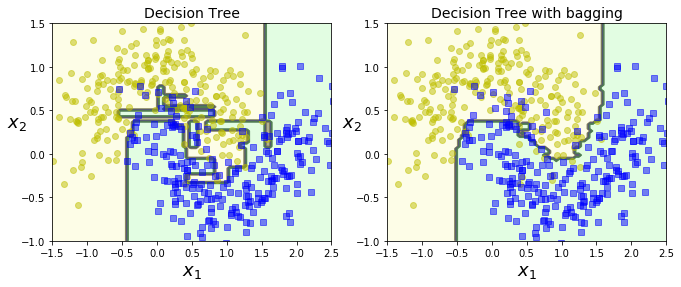

In [22]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Tree with bagging", fontsize=14)

plt.show()


In [34]:
## 랜덤포레스트
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random",max_leaf_nodes=16,random_state=42)
                            ,n_estimators=500,max_samples=1.0,bootstrap=True,n_jobs=-1,random_state=42)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.92


In [36]:
rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1,
                                random_state=42)
rnd_clf.fit(X_train,y_train)
y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf))

0.912


In [38]:
np.sum(y_pred == y_pred_rf) / len(y_pred_rf) # 예측이 거의 동일

0.976

In [55]:
iris = load_iris()
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [56]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1,random_state=42)
rnd_clf.fit(iris["data"],iris["target"])
for name,score in zip(iris["feature_names"],rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.11249225099876374
sepal width (cm) 0.023119288282510326
petal length (cm) 0.44103046436395765
petal width (cm) 0.4233579963547681


In [57]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

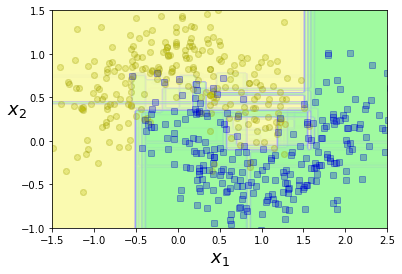

In [61]:
plt.figure(figsize=(6, 4))

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.02, contour=False)

plt.show()

In [62]:
# oob평가
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                           n_estimators=500,bootstrap=True,n_jobs=-1,oob_score=True,
                           random_state=40)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.9013333333333333

In [63]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.912

In [64]:
bag_clf.oob_decision_function_

array([[0.31746032, 0.68253968],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08379888, 0.91620112],
       [0.31693989, 0.68306011],
       [0.02923977, 0.97076023],
       [0.97687861, 0.02312139],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.71195652, 0.28804348],
       [0.83957219, 0.16042781],
       [0.97777778, 0.02222222],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97297297, 0.02702703],
       [0.95238095, 0.04761905],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.38947368, 0.61052632],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.96685083, 0.03314917],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.64804469, 0.35195531],
       [0.

In [ ]:
# baggingclassifier는 결정트리 앙상블외에 다른 classifier를 앙상블할때 유효하다.
# 보통 결정트리 앙상블은 randomforestclassifier로 앙상블한다.

In [70]:
rnd_clf = RandomForestClassifier(n_estimators=500,
                                max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train,y_train)

y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf))

bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random",max_leaf_nodes=16)
                            ,n_estimators=500,max_samples=1.0,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred_bag = bag_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_bag))

0.912
0.904


In [71]:
# 특성 중요도
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [86]:
rnd_clf = RandomForestClassifier(n_estimators=10,random_state=42)
rnd_clf.fit(mnist["data"],mnist["target"])
for name,score in zip(mnist["feature_names"],rnd_clf.feature_importances_):
    print(name,score)

pixel1 0.0
pixel2 0.0
pixel3 0.0
pixel4 0.0
pixel5 0.0
pixel6 0.0
pixel7 0.0
pixel8 0.0
pixel9 0.0
pixel10 0.0
pixel11 0.0
pixel12 0.0
pixel13 0.0
pixel14 0.0
pixel15 0.0
pixel16 0.0
pixel17 0.0
pixel18 0.0
pixel19 0.0
pixel20 0.0
pixel21 0.0
pixel22 0.0
pixel23 0.0
pixel24 0.0
pixel25 0.0
pixel26 0.0
pixel27 0.0
pixel28 0.0
pixel29 0.0
pixel30 0.0
pixel31 0.0
pixel32 0.0
pixel33 0.0
pixel34 0.0
pixel35 0.0
pixel36 0.0
pixel37 0.0
pixel38 0.0
pixel39 3.116259684556092e-06
pixel40 1.4966835632515134e-05
pixel41 9.154236552177962e-06
pixel42 0.0
pixel43 3.127644055593785e-06
pixel44 1.8085536573174283e-05
pixel45 1.0034007985965097e-05
pixel46 3.0641636062726584e-06
pixel47 0.0
pixel48 0.0
pixel49 0.0
pixel50 0.0
pixel51 0.0
pixel52 0.0
pixel53 0.0
pixel54 0.0
pixel55 0.0
pixel56 0.0
pixel57 0.0
pixel58 0.0
pixel59 0.0
pixel60 0.0
pixel61 0.0
pixel62 0.0
pixel63 3.0969261660829717e-06
pixel64 1.2286238275256624e-05
pixel65 8.4549322824862e-05
pixel66 9.226161521207416e-06
pixel67 1.21439

pixel667 5.99767829009374e-05
pixel668 3.301547638064406e-05
pixel669 1.530501123307371e-05
pixel670 8.464268457857173e-06
pixel671 0.0
pixel672 0.0
pixel673 0.0
pixel674 0.0
pixel675 2.9111552041181165e-06
pixel676 6.04673229133023e-07
pixel677 2.216284142694101e-05
pixel678 7.822959201712843e-05
pixel679 0.0001561262143955449
pixel680 0.000467914564917918
pixel681 0.0008428967221751745
pixel682 0.0005941423414683598
pixel683 0.0024464202342598745
pixel684 0.0012262956297420275
pixel685 0.001091611193722321
pixel686 0.0011698083818883214
pixel687 0.0010999870368898809
pixel688 0.0009162456937225963
pixel689 0.00036003801535550997
pixel690 0.00044570729576240897
pixel691 0.0002576037105618032
pixel692 0.00022760286897714565
pixel693 0.00014846130419961492
pixel694 0.00010073102677524834
pixel695 2.8297612588909548e-05
pixel696 4.732943311716976e-06
pixel697 1.4218893500942523e-05
pixel698 0.0
pixel699 0.0
pixel700 0.0
pixel701 0.0
pixel702 0.0
pixel703 0.0
pixel704 0.0
pixel705 7.10428

In [83]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.hot,
               interpolation="nearest")
    plt.axis("off")

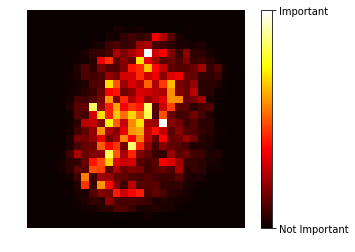

In [85]:
# 랜덤포레스트는 특히 특성을 선택해야 할 때 어떤 특성이 중요한지 빠르게 확인 할 수 있다
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not Important', 'Important'])

plt.show()

In [110]:
# 아다부트스 : 이전 예측기를 보완하는 예측기를 만드는 방법은 이전 모델이 과소적합
# 했던 훈련 샘플의 가중치를 더 높이는 것 이렇게 하면 새로운 예측기는 학습하기 어려운
# 샘플에 점점 더 맞춰지게 됌.
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200,
                            algorithm="SAMME.R",learning_rate=0.5)
ada_clf.fit(X_train,y_train)
y_pred_ada = ada_clf.predict(X_test)

In [97]:
print(accuracy_score(y_test,y_pred_ada))

0.896


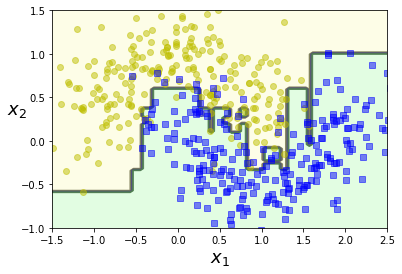

In [111]:
plot_decision_boundary(ada_clf,X,y)

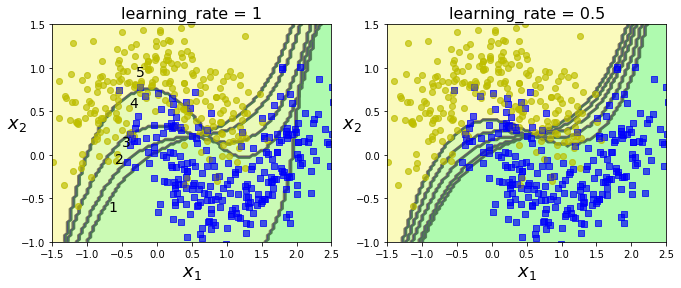

In [119]:
m = len(X_train)

plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)        
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma='auto', random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)


plt.show()

In [120]:
list(m for m in dir(ada_clf) if not m.startswith("_") and m.endswith("_"))

['base_estimator_',
 'classes_',
 'estimator_errors_',
 'estimator_weights_',
 'estimators_',
 'feature_importances_',
 'n_classes_']

In [118]:
sample_weights = np.ones(len(X_train))

sample_weights[y_pred!=y_train] *= (1+1)

print(sample_weights)

[1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1.